<a target="_blank" href="https://colab.research.google.com/github/instadeepai/jumanji/blob/main/examples/training.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
%%capture
!pip install --quiet -U "jumanji[train] @ git+https://github.com/instadeepai/jumanji.git@main"

In [1]:
# @title Set up JAX for available hardware (run me) { display-mode: "form" }

import subprocess
import os

# Based on https://stackoverflow.com/questions/67504079/how-to-check-if-an-nvidia-gpu-is-available-on-my-system
try:
    subprocess.check_output("nvidia-smi")
    print("a GPU is connected.")
except Exception:
    # TPU or CPU
    if "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
        import jax.tools.colab_tpu

        jax.tools.colab_tpu.setup_tpu()
        print("A TPU is connected.")
    else:
        print("Only CPU accelerator is connected.")

Only CPU accelerator is connected.


In [2]:
import warnings

warnings.filterwarnings("ignore")

from jumanji.training.train import train
from hydra import compose, initialize

In [3]:
env = "tetris"  # @param ['bin_pack', 'cleaner', 'connector', 'cvrp', 'game_2048', 'graph_coloring', 'job_shop', 'knapsack', 'maze', 'minesweeper', 'mmst', 'multi_cvrp', 'robot_warehouse', 'rubiks_cube', 'search_and_rescue', 'snake', 'sudoku', 'tetris', 'tsp']
agent = "a2c_simba"  # @param ['random', 'a2c', 'a2c_simba']
with initialize(version_base=None, config_path="../jumanji/training/configs"):
    cfg = compose(
        config_name="config.yaml",
        overrides=[
            f"env={env}",
            f"agent={agent}",
            "logger.type=terminal",
            "logger.save_checkpoint=true",
        ],
    )

train(cfg)

INFO:root:{'devices': [CpuDevice(id=0)]}
INFO:root:Experiment: a2c_simba_tetris.


Inside _setup_actor_critic_neworks_simba


INFO:root:Starting logger.
INFO:root:Eval Stochastic >> Env Steps: 0.00e+00 | Episode Length: 14.229 | Episode Return: 3.516 | Time: 1.357
INFO:root:Eval Greedy >> Env Steps: 0.00e+00 | Episode Length: 14.808 | Episode Return: 4.668 | Time: 1.192
INFO:root:Saving checkpoint...

KeyboardInterrupt



In [ ]:
env = "tetris"  # @param ['bin_pack', 'cleaner', 'connector', 'cvrp', 'game_2048', 'graph_coloring', 'job_shop', 'knapsack', 'maze', 'minesweeper', 'mmst', 'multi_cvrp', 'robot_warehouse', 'rubiks_cube', 'search_and_rescue', 'snake', 'sudoku', 'tetris', 'tsp']
agent = "a2c_simba"  # @param ['random', 'a2c', 'a2c_simba']

In [13]:
# @title Download Jumanji Configs (run me) { display-mode: "form" }

import os
import requests


def download_file(url: str, file_path: str) -> None:
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)
    else:
        print("Failed to download the file.")


os.makedirs("configs", exist_ok=True)
config_url = "https://raw.githubusercontent.com/instadeepai/jumanji/main/jumanji/training/configs/config.yaml"
download_file(config_url, "configs/config.yaml")
env_url = f"https://raw.githubusercontent.com/instadeepai/jumanji/main/jumanji/training/configs/env/{env}.yaml"
os.makedirs("configs/env", exist_ok=True)
download_file(env_url, f"configs/env/{env}.yaml")

In [6]:
env = "tetris"  # @param ['bin_pack', 'cleaner', 'connector', 'cvrp', 'game_2048', 'graph_coloring', 'job_shop', 'knapsack', 'maze', 'minesweeper', 'mmst', 'multi_cvrp', 'robot_warehouse', 'rubiks_cube', 'search_and_rescue', 'snake', 'sudoku', 'tetris', 'tsp']
agent = "a2c_simba"  # @param ['random', 'a2c', 'a2c_simba']
with initialize(version_base=None, config_path="../jumanji/training/configs"):
    cfg = compose(
        config_name="config.yaml",
        overrides=[
            f"env={env}",
            f"agent={agent}",
            "logger.type=terminal",
            "logger.save_checkpoint=true",
        ],
    )

train(cfg)

INFO:root:agent: a2c_simba
seed: 0
logger:
  type: terminal
  save_checkpoint: true
  name: ${agent}_${env.name}
env:
  name: tetris
  registered_version: Tetris-v0
  network:
    conv_num_channels: 64
    tetromino_layers:
    - 16
    - 16
    head_layers:
    - 128
  training:
    num_epochs: 100
    num_learner_steps_per_epoch: 150
    n_steps: 30
    total_batch_size: 128
  evaluation:
    eval_total_batch_size: 1024
    greedy_eval_total_batch_size: 1024
  a2c:
    normalize_advantage: false
    discount_factor: 0.9
    bootstrapping_factor: 0.9
    l_pg: 1.0
    l_td: 1.0
    l_en: 0.01
    learning_rate: 0.0003
  a2c_simba:
    normalize_advantage: false
    discount_factor: 0.9
    bootstrapping_factor: 0.9
    l_pg: 1.0
    l_td: 1.0
    l_en: 0.01
    learning_rate: 0.0003

INFO:root:{'devices': [CpuDevice(id=0)]}
INFO:root:Experiment: a2c_simba_tetris.


Inside _setup_actor_critic_neworks_simba


NameError: name 'he_normal' is not defined

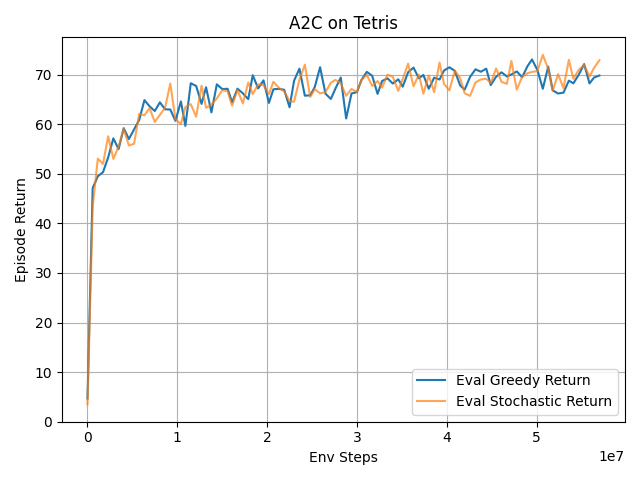

In [4]:
import re
import matplotlib.pyplot as plt

log_path = "training_output_3.log"  # adjust if needed

plt.clf()
greedy_returns = []
stochastic_returns = []
steps = []

with open(log_path, "r") as f:
    for line in f:
        if "Eval Greedy" in line:
            match = re.search(r"Env Steps: ([\d.e+]+).*?Episode Return: ([\d.]+)", line)
            if match:
                steps.append(float(match.group(1)))
                greedy_returns.append(float(match.group(2)))
        elif "Eval Stochastic" in line:
            match = re.search(r"Env Steps: ([\d.e+]+).*?Episode Return: ([\d.]+)", line)
            if match:
                stochastic_returns.append(float(match.group(2)))

# Plotting
plt.plot(steps, greedy_returns, label="Eval Greedy Return")
plt.plot(steps, stochastic_returns, label="Eval Stochastic Return", alpha=0.7)
plt.xlabel("Env Steps")
plt.ylabel("Episode Return")
plt.title("A2C on Tetris")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
